<a href="https://colab.research.google.com/github/Yong-Hui-Liew/PyTorch-Adventure/blob/main/01_pytorch_exercise_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

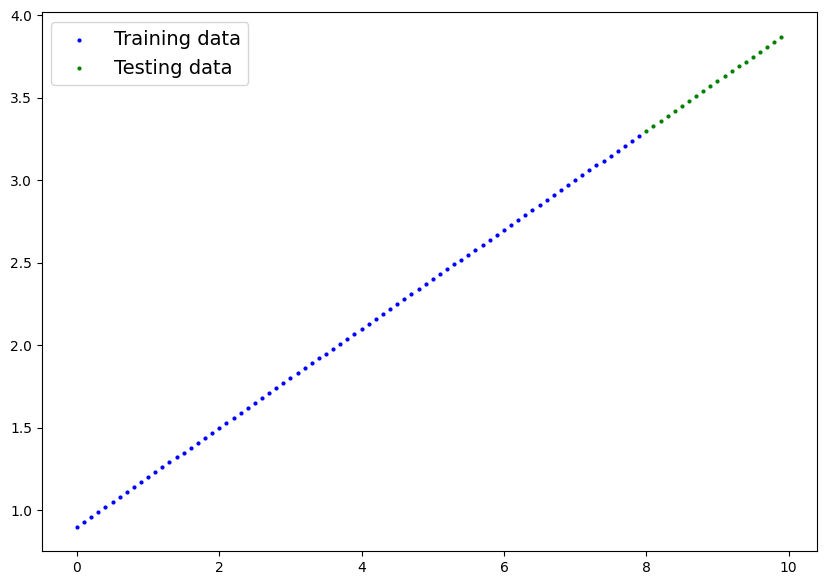

In [27]:
weight = 0.3
bias = 0.9
X = torch.arange(start=0, end=10, step=0.1).unsqueeze(dim=1)
y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
***Note:** If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [28]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                    out_features=1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [29]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

epochs = 300

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model_0.eval()
    with torch.inference_mode():
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch:{epoch} | loss:{loss} | test_loss:{test_loss}")


Epoch:0 | loss:1.7672735452651978 | test_loss:3.7248260974884033
Epoch:20 | loss:0.07500676810741425 | test_loss:0.3603351414203644
Epoch:40 | loss:0.08991314470767975 | test_loss:0.26105359196662903
Epoch:60 | loss:0.025813329964876175 | test_loss:0.36515316367149353
Epoch:80 | loss:0.037320829927921295 | test_loss:0.3143957257270813
Epoch:100 | loss:0.021646490320563316 | test_loss:0.3375694155693054
Epoch:120 | loss:0.01556048821657896 | test_loss:0.3450304865837097
Epoch:140 | loss:0.013060671277344227 | test_loss:0.3475303053855896
Epoch:160 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:180 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:200 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:220 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:240 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:260 | loss:0.012310720048844814 | test_loss:0.3482802212238312
Epoch:280 | loss:0.012310720048844814 | tes

## 4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

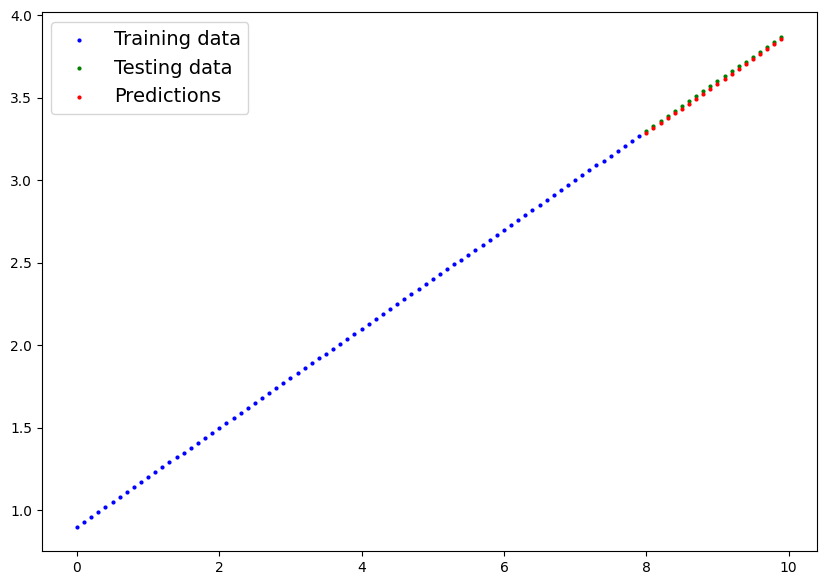

In [36]:
with torch.inference_mode():
  y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)

## 5. Save your trained model's `state_dict()` to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [41]:
from pathlib import Path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_exercise_model_1.pth"
MODEL_PATH_NAME = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_PATH_NAME)

In [48]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_PATH_NAME))

with torch.inference_mode():
  loaded_pred = loaded_model(X_test)

loaded_pred, y_pred

(tensor([[3.2853],
         [3.3153],
         [3.3452],
         [3.3751],
         [3.4051],
         [3.4350],
         [3.4650],
         [3.4949],
         [3.5248],
         [3.5548],
         [3.5847],
         [3.6147],
         [3.6446],
         [3.6746],
         [3.7045],
         [3.7344],
         [3.7644],
         [3.7943],
         [3.8243],
         [3.8542]]),
 tensor([[3.2853],
         [3.3153],
         [3.3452],
         [3.3751],
         [3.4051],
         [3.4350],
         [3.4650],
         [3.4949],
         [3.5248],
         [3.5548],
         [3.5847],
         [3.6147],
         [3.6446],
         [3.6746],
         [3.7045],
         [3.7344],
         [3.7644],
         [3.7943],
         [3.8243],
         [3.8542]]))